# WeatherPy
----

### Analysis
* The weather becomes warmer as one approaches the equator (Latitude 0). There are more data points with positive Latitude because there are more cities in the Northern hemisphere.
* There is no strong relationship between Latitude and Cloudiness or Humidity.
* Stronger wind speeds (> 25 mph) occur at higher latitudes (<-40 or >40).

---

In [13]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [14]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = {}

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities[city] = lat_lng

# Print the city count to confirm sufficient count
len(cities)

642

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [19]:
import numpy as np

temperature = []
humidity = []
cloudiness = []
wind_speed = []

city_names = list(cities.keys())
city_names.sort()
count = 0

# used 5-day weather forecast api and collected the median temperature, humidity, etc for each city
# https://openweathermap.org/forecast5

for city in city_names:
    lat,lng = cities[city] 
    response = requests.get(f'http://api.openweathermap.org/data/2.5/forecast?lat={lat}&lon={lng}&appid={api_key}&units=Imperial').json()
    temperature.append( np.median([block['main']['temp'] for block in response['list']]) )
    humidity.append( np.median([block['main']['humidity'] for block in response['list']]) )
    cloudiness.append( np.median([block['clouds']['all'] for block in response['list']]) )
    wind_speed.append( np.median([block['wind']['speed'] for block in response['list']]) )
    count += 1
    print(f'Index:{count} City:{city}')

Index:1 City:abalak
Index:2 City:abha
Index:3 City:abnub
Index:4 City:abu dhabi
Index:5 City:acapulco
Index:6 City:acari
Index:7 City:acton
Index:8 City:adrar
Index:9 City:adwa
Index:10 City:aflu
Index:11 City:aginskoye
Index:12 City:aguimes
Index:13 City:airai
Index:14 City:aitape
Index:15 City:aklavik
Index:16 City:alamogordo
Index:17 City:albany
Index:18 City:alghero
Index:19 City:almaznyy
Index:20 City:alofi
Index:21 City:along
Index:22 City:alugan
Index:23 City:ambalavao
Index:24 City:ambilobe
Index:25 City:amderma
Index:26 City:ancud
Index:27 City:andenes
Index:28 City:ang thong
Index:29 City:ankang
Index:30 City:antofagasta
Index:31 City:aquiraz
Index:32 City:aracati
Index:33 City:ardistan
Index:34 City:arica
Index:35 City:arlit
Index:36 City:armacao dos buzios
Index:37 City:arman
Index:38 City:arraial do cabo
Index:39 City:arroio grande
Index:40 City:arroyo
Index:41 City:artyk
Index:42 City:arvika
Index:43 City:astana
Index:44 City:at-bashi
Index:45 City:atambua
Index:46 City:a

Index:350 City:maningrida
Index:351 City:mar del plata
Index:352 City:marawi
Index:353 City:marcona
Index:354 City:mareeba
Index:355 City:margate
Index:356 City:markala
Index:357 City:marquette
Index:358 City:marsh harbour
Index:359 City:mastic
Index:360 City:matamoros
Index:361 City:mataura
Index:362 City:mecca
Index:363 City:mehamn
Index:364 City:merauke
Index:365 City:meulaboh
Index:366 City:meyungs
Index:367 City:mikuni
Index:368 City:milton
Index:369 City:minab
Index:370 City:mirabad
Index:371 City:mocambique
Index:372 City:moerai
Index:373 City:mongo
Index:374 City:morgantown
Index:375 City:moron
Index:376 City:mount isa
Index:377 City:muisne
Index:378 City:muros
Index:379 City:muzhappilangad
Index:380 City:muzhi
Index:381 City:myrtle beach
Index:382 City:mys shmidta
Index:383 City:nabire
Index:384 City:nahrin
Index:385 City:namibe
Index:386 City:nanortalik
Index:387 City:nantucket
Index:388 City:narsaq
Index:389 City:natal
Index:390 City:necochea
Index:391 City:nesna
Index:392 C

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [63]:
lats = [ cities[city][0] for city in city_names]
lngs = [ cities[city][1] for city in city_names]

df = pd.DataFrame()
df['City'] = city_names
df['Temperature'] = temperature
df['Humidity'] = humidity
df['Cloudiness'] = cloudiness
df['Wind Speed'] = wind_speed
df['Latitude'] = lats
df['Longitude'] = lngs

df.to_csv('cities.csv', index=False)
df.head(20)

,City,Temperature,Humidity,Cloudiness,Wind Speed,Latitude,Longitude
0,abalak,73.420,32.5,0.0,6.530,17.545919,4.922854
1,abha,63.605,20.5,0.0,3.960,19.491949,43.874774
2,abnub,55.350,48.5,0.0,7.315,27.406980,29.683732
3,abu dhabi,67.875,31.5,0.0,6.700,23.579011,52.844586
4,acapulco,79.890,100.0,56.0,6.745,2.983608,-106.192716
5,acari,74.895,100.0,88.0,12.910,-17.599898,-75.480738
6,acton,21.960,65.5,32.0,5.500,42.497046,-71.523252
7,adrar,63.395,31.5,0.0,6.700,26.496162,-0.299372
8,adwa,65.030,34.0,0.0,3.500,14.329214,38.800546
9,aflu,55.465,75.0,0.0,4.465,31.362305,1.190240


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

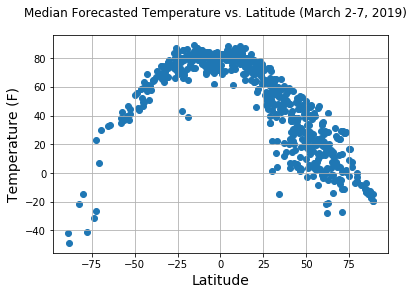

In [57]:
plt.scatter(df['Latitude'],df['Temperature'])
plt.grid()
plt.suptitle('Median Forecasted Temperature vs. Latitude (March 2-7, 2019)', weight='medium')
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Temperature (F)', fontsize=14)
plt.savefig('lat_temp.png')


#### Latitude vs. Humidity Plot

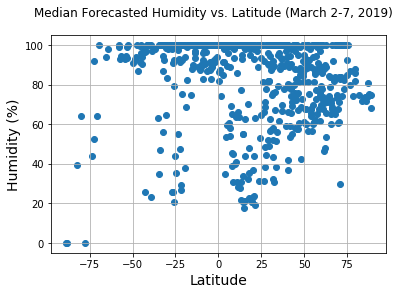

In [58]:
plt.scatter(df['Latitude'],df['Humidity'])
plt.grid()
plt.suptitle('Median Forecasted Humidity vs. Latitude (March 2-7, 2019)', weight='medium')
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Humidity (%)', fontsize=14)
plt.savefig('lat_humidity.png')

#### Latitude vs. Cloudiness Plot

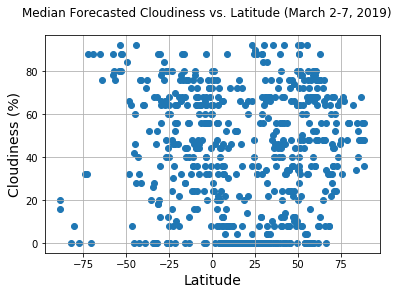

In [60]:
plt.scatter(df['Latitude'],df['Cloudiness'])
plt.grid()
plt.suptitle('Median Forecasted Cloudiness vs. Latitude (March 2-7, 2019)', weight='medium')
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Cloudiness (%)', fontsize=14)
plt.savefig('lat_clouds.png')

#### Latitude vs. Wind Speed Plot

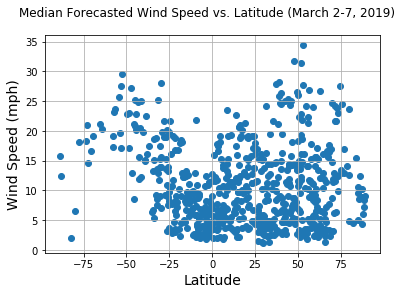

In [61]:
plt.scatter(df['Latitude'],df['Wind Speed'])
plt.grid()
plt.suptitle('Median Forecasted Wind Speed vs. Latitude (March 2-7, 2019)', weight='medium')
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Wind Speed (mph)', fontsize=14)
plt.savefig('lat_winds.png')